# Question 1: Linear Regression Model

### Importing of Libraries & Loading of the data set into a dataframe

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("sgemm_product.csv")

### Performing exploratory data analysis 

#### Step 1: Shape Analysis

In [40]:
df.shape

(241600, 18)

#### Step 2: Attribute Analysis

In [41]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


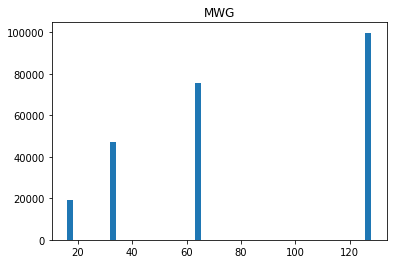

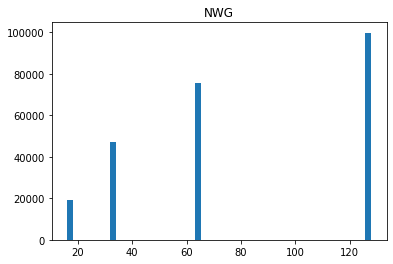

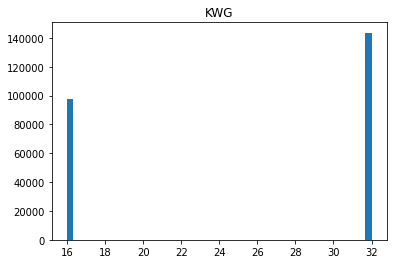

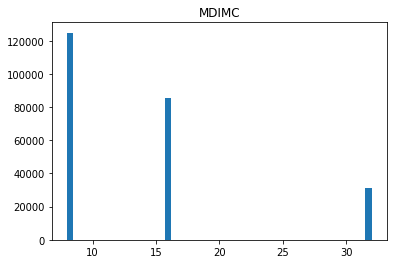

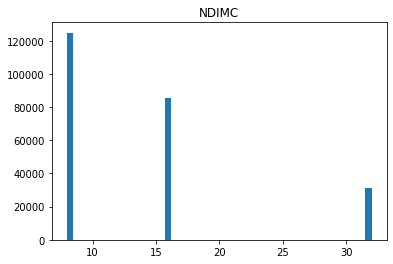

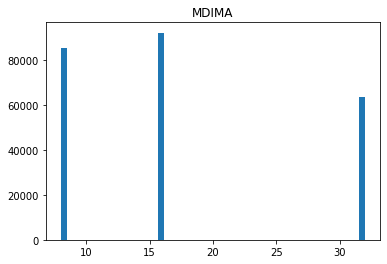

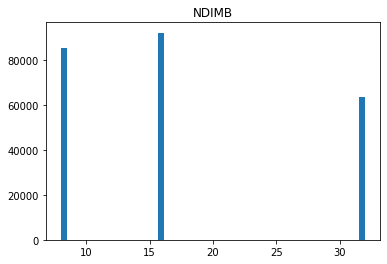

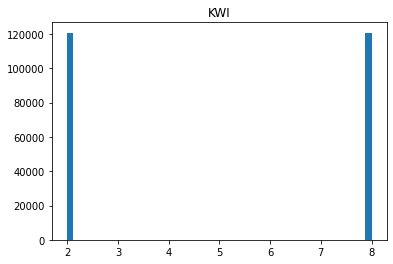

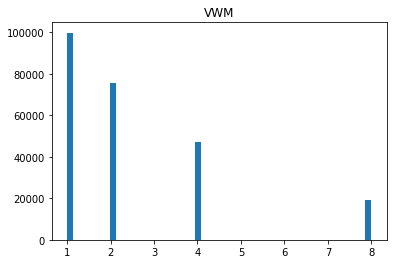

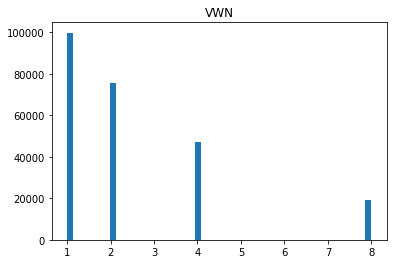

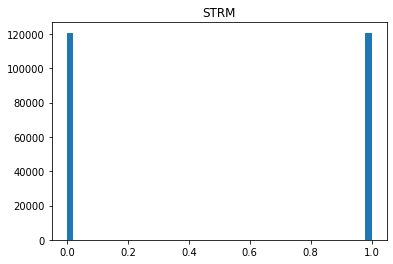

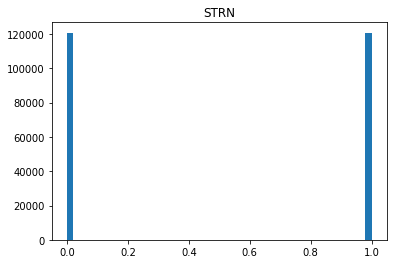

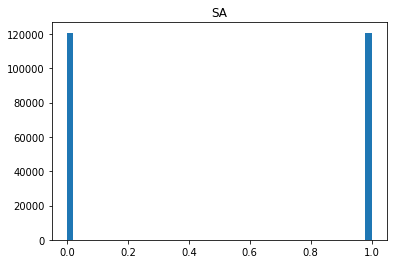

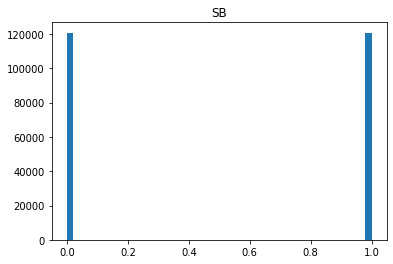

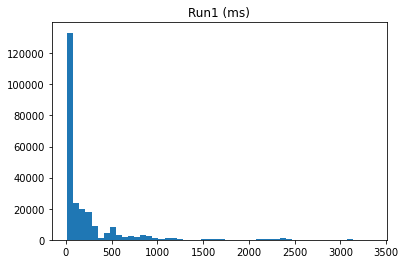

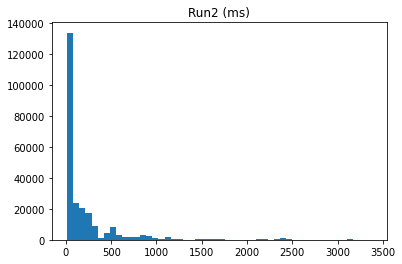

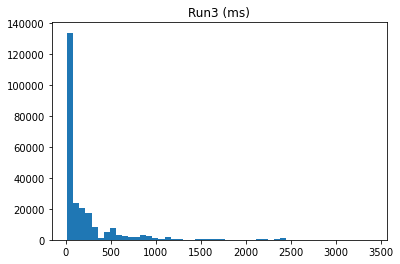

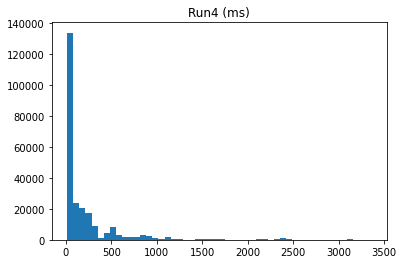

In [43]:
for name in df.columns:
    plt.title(name)
    plt.hist(df[name], bins=50)
    plt.show()

#### Step 3: Missing Value Analysis

In [44]:
pd.isnull(df).sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

#### Step 4: Attribute's Statistical Analysis

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.00,32.00,64.000,128.00,128.00
NWG,241600.0,80.415364,42.469220,16.00,32.00,64.000,128.00,128.00
KWG,241600.0,25.513113,7.855619,16.00,16.00,32.000,32.00,32.00
MDIMC,241600.0,13.935894,7.873662,8.00,8.00,8.000,16.00,32.00
NDIMC,241600.0,13.935894,7.873662,8.00,8.00,8.000,16.00,32.00
MDIMA,241600.0,17.371126,9.389418,8.00,8.00,16.000,32.00,32.00
NDIMB,241600.0,17.371126,9.389418,8.00,8.00,16.000,32.00,32.00
KWI,241600.0,5.000000,3.000006,2.00,2.00,5.000,8.00,8.00
VWM,241600.0,2.448609,1.953759,1.00,1.00,2.000,4.00,8.00
VWN,241600.0,2.448609,1.953759,1.00,1.00,2.000,4.00,8.00


Let's combine the runs into one column with this average value since we will utilize the average of the THREE (3) runs with long performance times for each data record.

In [46]:
def avg(lst):
    return sum(lst) / len(lst)

avg_runtime = []

for index, row in df.iterrows():
    tmp = [row['Run1 (ms)'],row['Run2 (ms)'],row['Run3 (ms)'],row['Run4 (ms)']]
    tmp.remove(min(tmp))
    avg_runtime += [avg(tmp)]

df['avgRun'] = avg_runtime
df = df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)
df.head()


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avgRun
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.740000
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.896667
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.806667
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,87.410000
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,119.946667


#### Step 5: Target Distribution Analysis

We will considerably improve if we change the distribution logarithmically because the goal runtime of the distribution exhibits a logarithmic distribution.

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avgRun', ylabel='Density'>

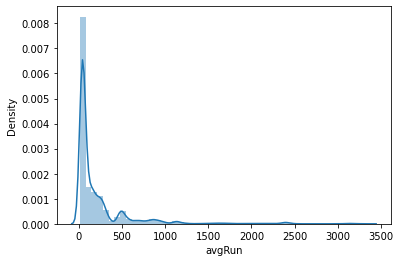

In [47]:
sns.distplot(df['avgRun'])

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

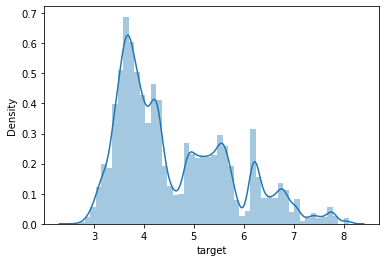

In [48]:
df['target']=np.log(df.avgRun)
sns.distplot(df['target'])

Our target variable now has a plainly discernible normal distribution.

#### Step 6: Correlation Analysis

<AxesSubplot:>

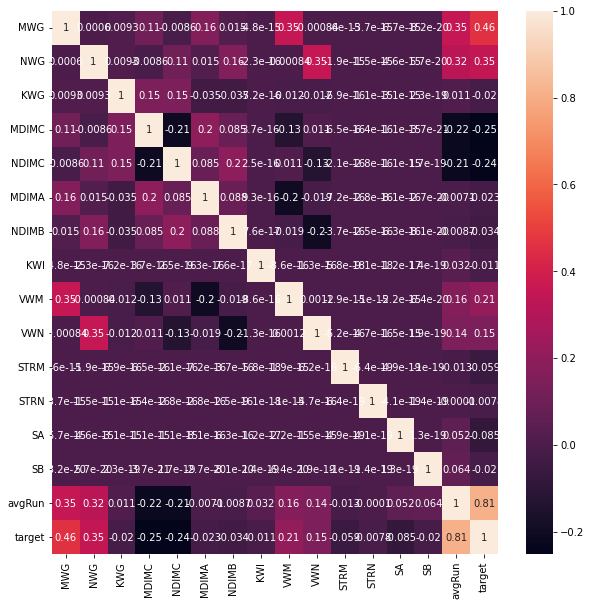

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),color='k',annot=True)

Text(0.5, 1.0, 'Correlation of Parameters with target')

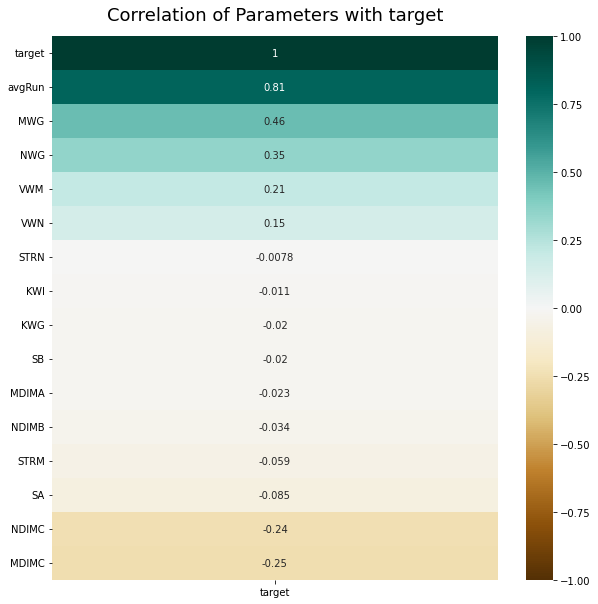

In [50]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation of Parameters with target', fontdict={'fontsize':18}, pad=16)

In light of this, we can select the best three metrics as those that are most correlated: MWG (0.46), MDIMC (-0.25), and NWG (0.35).

### Further Pre-processing

In [51]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [52]:
#Keep only the 3 best parameters mentioned above
df = df.filter(['MWG', 'NWG', 'MDIMC', 'target'])

#### Test-Train Split

In [53]:
x = df.drop(['target'],axis=1).values
y = df['target'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#### Training the regression modle

In [54]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [55]:
print("Intercept of the model is: ",linreg.intercept_)
print("Coefficients of the model are: ",linreg.coef_)

Intercept of the model is:  3.4415884572298063
Coefficients of the model are:  [ 0.01310043  0.00915235 -0.04330122]


### Analysis

#### Therefore, Our linear regression equation obtained from learning the dataset is
##### Y = 3.4415884572298063 + 0.01310043 * x1(MWG) + 0.00915235 * x2(NWG) - 0.04330122 * x3(MDIMC)

We may therefore draw the conclusion that MWG and NWG are positively associated with the target with a low coefficient of variation because the average runtime (Target) is typically high (mean = 75). But because the constant is negative, MDIMC has an inverse relationship with the goal.

#### Will Scaling help?

Performance may be marginally enhanced by scaling data. This is as a result of MWG and NWG parameters being between (16,128). When one parameter is biased in that way, conflict results. The data needs to be scaled or normalized in this case as well, if only for safety's sake.

However, based on higher association, adding additional factors beyond 3 will surely boost performance. We can draw this conclusion because most correlated parameters reduce the inaccuracy. When error does not considerably diminish with time, the recommended number of parameters should be used. However, our model shows that the MSE is still very high even with just the three best values.

### Performance Analysis:

Predictions

In [56]:
y_pred = linreg.predict(x_test)

Evaluation

In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("Mean Squared error is: %.2f" % mean_squared_error(y_test,y_pred))
print("Mean Absolute error is:  %.2f" % mean_absolute_error(y_test,y_pred))
Acc = r2_score(y_test,y_pred)*100
print("r2 Score Accuracy of the model is %.2f" %Acc)

Mean Squared error is: 0.74
Mean Absolute error is:  0.70
r2 Score Accuracy of the model is 41.15
